In questa lezione iniziamo a manipolare alcuni grafi attraverso il package __NetworkX__ (https://networkx.github.io/)<br>
Il package NetworkX è parte della distribuzione Anaconda, quindi può essere importato attraverso la parola riservata __import__, che abbiamo introdotto nel precedente Jupyter notebook.

In [2]:
import networkx as nx
from statsmodels.distributions.empirical_distribution import ECDF
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

La parola riservata __as__ viene utilizzata per rinominare il package. In questo caso risparmio solo caratteri, in altri casi posso utilizzare l'alias per evitare _name conflict_.

# Creare un grafo
Iniziamo creando un grafo vuoto. In particolare creeremo un grafo non orientato.

I grafi non orientati vengono modellati dalla classe __Graph__. Questa classe utilizza una struttura di tipo dictionary di dictionary di dictionary per memorizzare i nodi, gli archi e gli attributi relativi.
<img src="figures/Graph_internal.JPG">
Il dictionary più esterno utilizza come chiave i nodi. Più precisamente l'insieme dei nodi può essere rappresentato da una qualsiasi struttura dict-like (stesso comportamento di un dictionary). Per questo motivo i nodi possono essere  qualsiasi oggetto _hashable_.<br>

Per __creare un grafo__ invoco il costruttore...

In [3]:
grafo_non_orientato = nx.Graph()

Una grafo può essere generato in modi diversi: dall'aggiunta/rimozione di ogni singolo nodo/arco alla lettura da file, passando per la generazione di grafi casuali. NetworkX supporta tutti questi processi di creazione/evoluzione.

In questa prima parte utilizzare i metodi per la creazione step-by-step.
### Nodi
Aggiungiamo un singolo nodo...

In [7]:
grafo_non_orientato.add_node('A')

Oppure possiamo inserire più nodi nello stesso momento passando un qualsiasi oggetto iterabile, anche un grafo stesso ...

In [4]:
grafo_non_orientato.add_nodes_from(['B','C'])

Esempio con un 'line' graph ....

In [5]:
line_graph = nx.path_graph(4)
grafo_non_orientato.add_nodes_from(line_graph.nodes()) #nodi 'semplici'
grafo_non_orientato.add_node(line_graph) #nodo complesso e' un grafo

Nella seconda istruzione viene creato un iteratore sull'insieme dei nodi del grafo *line_graph*, mentre nella terza istruzione viene inserito il grafo come nodo. In sintesi si possono creare grafi di grafi, etc...

Il metodo __nodes()__ mi restituisce una NodeView, passabile come argomento del costruttore **list()**

In [8]:
grafo_non_orientato.nodes()

NodeView(('B', 'C', 0, 1, 2, 3, <networkx.classes.graph.Graph object at 0x000001BDD7272DD8>, 'A'))

In [9]:
list(grafo_non_orientato.nodes())

['B', 'C', 0, 1, 2, 3, <networkx.classes.graph.Graph at 0x1bdd7272dd8>, 'A']

#### Attributi del nodo
Ad un nodo posso associare uno o più oggetti che lo caratterizzano = __attributi__. Gli attributi vengono memorizzati in una struttura dict-like.

Posso assegnare un attributo ad un nodo al momento della creazione ...

In [16]:
grafo_non_orientato.add_node('D',name='James',drink='beer')

Oppure posso modificare o inserire un nuovo attributo ad un nodo già inserito, utilizzando l'attributo __node__ dell'oggetto _Graph

In [11]:
grafo_non_orientato.node['B']['name'] = 'Marco'

Per iterare sui nodi e i relativi attributi utilizzo il metodo **nodes** 

In [17]:
list(grafo_non_orientato.nodes(data=True))

[('B', {'name': 'Marco'}),
 ('C', {}),
 (0, {}),
 (1, {}),
 (2, {}),
 (3, {}),
 (<networkx.classes.graph.Graph at 0x1bdd7272dd8>, {}),
 ('A', {}),
 ('D', {'name': 'James', 'drink': 'beer'})]

In [18]:
[e[1] for e in list(grafo_non_orientato.nodes(data=True))]

[{'name': 'Marco'},
 {},
 {},
 {},
 {},
 {},
 {},
 {},
 {'name': 'James', 'drink': 'beer'}]

In [20]:
print(grafo_non_orientato.node['D']['drink'])
print(grafo_non_orientato.node['D'])

beer
{'name': 'James', 'drink': 'beer'}


In [21]:
grafo_non_orientato.node['D']['place'] = 'Milano'

In [22]:
grafo_non_orientato.node['D']

{'name': 'James', 'drink': 'beer', 'place': 'Milano'}

### Archi
Come per i nodi, posso inserire gli archi uno alla volta, specificandone gli estremi.

In [23]:
grafo_non_orientato.add_edge('A','B')

Oppure passando una lista di coppie (__tuple__ in Python) o triplette. Le triplette vengono utilizzate per specificare gli attributi associati all'arco

In [25]:
grafo_non_orientato.add_edges_from([('B','C'),('C','D'),(line_graph,'D')])

Il metodo __edges()__ restituisce una lista di tuple rappresentati gli archi nel grafo.

In [26]:
list(grafo_non_orientato.edges())

[('B', 'A'),
 ('B', 'C'),
 ('C', 'D'),
 (<networkx.classes.graph.Graph at 0x1bdd7272dd8>, 'D')]

#### Attributi
Anche agli archi posso associare degli attributi memorizzati come dictionary.

Posso assegnare un attributo al momento della sua creazione ...

In [27]:
grafo_non_orientato.add_edge(0,1,peso=30)

oppure si può modificare il dictionary __edges__ associato all'oggetto _Graph_

In [29]:
grafo_non_orientato.edges['A','B']['peso'] = 3

oppure in modo più conciso

In [30]:
grafo_non_orientato['C']['B']['peso'] = 40

__N.B.__ Se gli estremi dell'arco che inserisco non sono presenti nella rete, NetworkX automaticamente aggiunge gli estremi all'insieme dei nodi.

Per visualizzare gli archi e i relativi attributi utilizzo il metodo _edges()_ con il parametro __data=True__

In [32]:
list(grafo_non_orientato.edges(data=True))

[('B', 'A', {'peso': 3}),
 ('B', 'C', {'peso': 40}),
 ('C', 'D', {}),
 (0, 1, {'peso': 30}),
 (<networkx.classes.graph.Graph at 0x1bdd7272dd8>, 'D', {})]

In [36]:
grafo_non_orientato.edges['A','B']['peso'] = None

In [37]:
list(grafo_non_orientato.edges(data=True))

[('B', 'A', {'peso': None}),
 ('B', 'C', {'peso': 40}),
 ('C', 'D', {}),
 (0, 1, {}),
 (<networkx.classes.graph.Graph at 0x1bdd7272dd8>, 'D', {})]

###  Rimozione archi e nodi
Per rimuovere gli archi e i nodi posso applicare i seguenti metodi:
* remove_node()
* remove_nodes_from()
* remove_edge()
* remove_edges_from()

che rappresentano la controparte dei metodi di inserimento visti in precedenza.

Per cancellare tutti gli elementi si invoca il metodo __clear()__

## Visualizzare un grafo 
NetworkX fornisce dei metodi per visualizzare i grafi, tuttavia la visualizzazione è piuttosto semplice e limitata. Per questo motivo solo in questa lezione utilizzeremo i metodi di NetworkX, mentre nelle successive sfrutteremo dei tool specifici per la visualizzazione, quali Gephi

### Visualizzazione con matplotlib
__Matplotlib__ è la libreria più utilizzata per visualizzare grafici.

Il metodo più semplice per la visualizzazione del grafo è __draw()__

C:\Users\matte\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


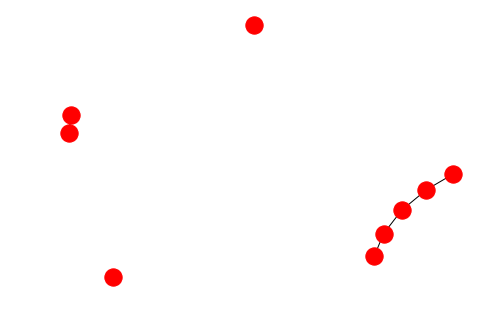

In [38]:
nx.draw(grafo_non_orientato)

__draw(G, pos=None, ax=None, hold=None, **kwds)__

Draw the graph as a __simple representation with no node labels or edge labels__ and using the full Matplotlib figure area and no axis labels by default. See draw_networkx() for more full-featured drawing that allows title, axis labels etc.

Parameters:	
__G__ (graph) – A networkx graph

__pos__ (dictionary, optional) – A dictionary with nodes as keys and positions as values. If not specified a spring layout positioning will be computed. See networkx.layout for functions that compute node positions.

ax (Matplotlib Axes object, optional) – Draw the graph in specified Matplotlib axes.

hold (bool, optional) – Set the Matplotlib hold state. If True subsequent draw commands will be added to the current axes.

kwds (optional keywords) – See networkx.draw_networkx() for a description of optional keywords.

E' possibile passare la posizione dei nodi attraverso il __parametro pos__. Tale opzione permette di utilizzare più algoritmi di visualizzazione. In particolare adotteremo il metodo **spring_layout** ...

C:\Users\matte\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


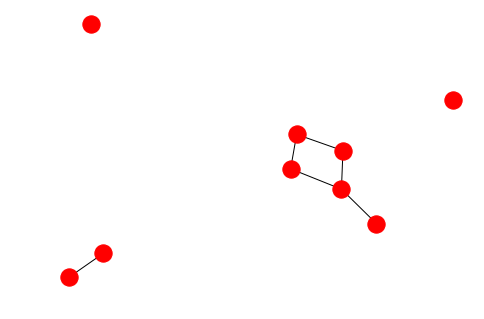

In [41]:
posizione = nx.spring_layout(grafo_non_orientato)
nx.draw(grafo_non_orientato, pos = posizione)

In [40]:
grafo_non_orientato.add_edge('A','D')

Gli altri metodi supportati sono:
* circular_layout
* fruchterman_reingold_layout
* random_layout
* shell_layout
* spectral_layout

Una visualizzazione più piacevole e più informativa si può ottenere utilizzando il metodo **draw_networkx()** (https://networkx.readthedocs.io/en/stable/reference/generated/networkx.drawing.nx_pylab.draw_networkx.html#networkx.drawing.nx_pylab.draw_networkx)

C:\Users\matte\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


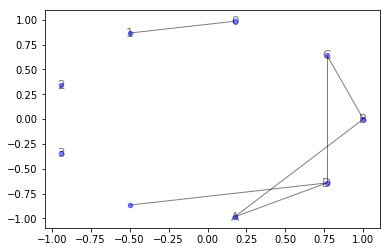

In [42]:
posizione_circular = nx.circular_layout(grafo_non_orientato)
nx.draw_networkx(grafo_non_orientato, pos= posizione_circular, node_size=20, alpha=0.5, node_color='blue')

## Leggere un grafo da file
Esistono molti formati per memorizzare un network e gli attributi relativi ai suoi elementi. In particolare ci soffermeremo sulle liste di adiacienza, le liste di archi, GEXF e gpickle.
### Lista di adiacenza
E' un formato adatto a network senza attributi associati a nodi o archi, dove i nodi sono facilmente rappresentabili come stringhe.

Il formato del file di testo prevede che ogni riga corrisponda ad un nodo, indicato dal primo elemento della linea. I suoi vicini costituiscono gli altri elementi della linea, separati da un carattere di separazione.

Per la creazione del grafo dato un file testuale che contiene una lista di adiacienza, possiamo utilizzare i metodi visti precedentemente e nella lezione 1.

In [43]:
adj_graph = nx.Graph()

['1,2,3,4\n', '2,3,1\n', '3,6,2,1\n', '4,5,1\n', '5,6,4\n', '6,5']
['1', '2', '3', '4']
['2', '3', '1']
['3', '6', '2', '1']
['4', '5', '1']
['5', '6', '4']
['6', '5']
[('1', '2'), ('1', '3'), ('1', '4'), ('2', '3'), ('3', '6'), ('4', '5'), ('6', '5')]


C:\Users\matte\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


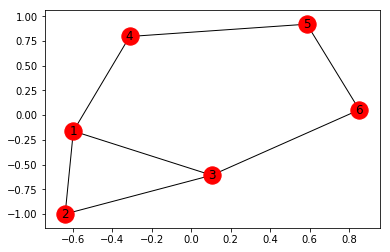

In [44]:
f = open('data/grafo_lista_adiacienza.txt')
lista_righe = f.readlines()
print(lista_righe)
for line in lista_righe:
    info = line.strip().split(',')
    print(info)
    for e in info[1:]:
        adj_graph.add_edge(info[0],e)
print(list(adj_graph.edges()))
nx.draw_networkx(adj_graph)

NetworkX fornisce un metodo per la lettura di questo formato:

**read_adjlist(path, comments='#', delimiter=None, create_using=None, nodetype=None, encoding='utf-8')**

In [46]:
adj_graph = nx.read_adjlist('data/grafo_lista_adiacienza.txt',
                            delimiter=',',nodetype=int,
                            create_using=nx.Graph())

In [47]:
adj_graph.nodes()

NodeView((1, 2, 3, 4, 6, 5))

### Lista degli archi, o meglio edge list
Questo formato prevede che ogni riga corrisponda ad un arco del grafo. Anche in questo caso utilizzo questo formato quando le informazioni circa il grafo sono facilmente rappresentabili attraverso stringhe. 

Non posso memorizzare informazioni riguardanti i nodi.

Se non prevedo attributi ogni riga segue il formato:<br>
_1 2_<br>
altrimenti gli attributi possono essere rappresentati come Python dictionary:

_1 2 {'peso':30,'colore':'verde'}_

oppure posso inserire solo i valori degli attributi senza specificarne il nome

_1 2 30 verde_

Per leggere una edge list, NetworkX fornisce il metodo

**read_edgelist(path, comments='#', delimiter=None, create_using=None, nodetype=None, data=True, edgetype=None, encoding='utf-8')**

In [48]:
edgelist_graph = nx.read_edgelist('data/grafo_edge_list.txt',
                                  delimiter=' ', 
                                  create_using=nx.Graph(),
                                  nodetype=int)

C:\Users\matte\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


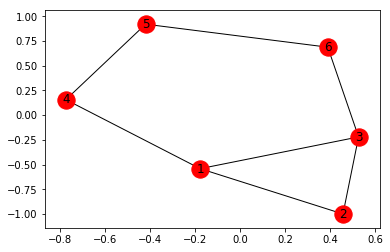

In [49]:
nx.draw_networkx(edgelist_graph)

### GEXF
GEXF (Graph Exchange XML Format) è un formato XML per la descrizione di network statiche e dinamiche e dei relativi attributi. Non ci soffermeremo sulle specifiche e lo schema del formato. 

Gephi,  software di visualizzazione, utilizza principalemente questo formato. Specificamente, una volta creato il grafo, lo salveremo nel formato GEXF e lo apriremo con Gephi per visualizzarlo (specialmente con reti di medie/grandi dimensioni).

Per salvare il grafo nel formato GEXF, NetworkX fornisce il metodo:

**write_gexf(G, path, encoding='utf-8', prettyprint=True, version='1.1draft')**


In [50]:
nx.write_gexf(edgelist_graph,'data/edgeList4Gephi.gexf')

### JSON
NetworkX permette di salvare il grafo nel formato JSON. Questa funzionalità è molto utile per un utilizzo combinato con d3.js (http://d3js.org/), una libreria  Python per la visualizzazione di grafici.

Il metodo **node_link_data** restituisce un dictionary che può essere esportato in JSON utilizzando il package json

In [51]:
import json
from networkx.readwrite import json_graph

In [52]:
graph_json = json_graph.node_link_data(adj_graph)
print(graph_json)

{'directed': False, 'multigraph': False, 'graph': {}, 'nodes': [{'id': 1}, {'id': 2}, {'id': 3}, {'id': 4}, {'id': 6}, {'id': 5}], 'links': [{'source': 1, 'target': 2}, {'source': 1, 'target': 3}, {'source': 1, 'target': 4}, {'source': 2, 'target': 3}, {'source': 3, 'target': 6}, {'source': 4, 'target': 5}, {'source': 6, 'target': 5}]}


In [53]:
json.dump(graph_json,open('data/graph_json.json','w'))

### Pickle
Il formato pickle è utilizzato da Python per la serializzazione degli oggetti. Per leggere/scrivere un grafo in formato pickle si utilizzano i seguenti metodi ...

In [54]:
nx.write_gpickle(adj_graph,'data/test_graph.pkl')

In [55]:
graph_reload = nx.read_gpickle('../)

## Network Repository
Finora abbiamo creato i nostri piccoli grafi, tuttavia possiamo sfruttare la presenza di molti repository. __Network Repository__ è tra i più completi (http://networkrepository.com/).

Le collezioni di dataset sono categorizzate secondo il tipo di dato. Oltre alle reti sociali (online e offline) ci sono reti biologiche, brain network, reti infrastrutturali, reti tecnologiche e grafi risultanti da crawling massivi.

### 1. Ricerca di una rete
Attraverso la funzione di ricerca possiamo cercare una network inviando una stringa di query. Nel caso delle online social network è sufficiente specificarne il nome: facebook, twitter, orkut, etc ..

Iniziamo la nostra analisi da una rete piccola, ma significativa: Zachary's Karate Club. Come parole chiave utilizziamo __karate__.

La pagina relativa alla network ci fornisce la sua descrizione, la sua visualizzazione (qualora la rete sia piccola), una serie di proprietà e alcune distribuzioni.
<img src="figures/netrepo_karate.png">

Procediamo scaricando il file 'karate.zip'. Il grafo è contenuto nel file 'karate.mtx' che possiamo aprire con un qualsiasi editor testuale.

Di seguito sono state riportate le prime righe del file.<br>

%%MatrixMarket matrix coordinate pattern symmetric<br>
34 34 78<br>
2 1<br>
3 1<br>
4 1<br>
5 1<br>
6 1<br>
7 1<br>
8 1<br>
9 1<br>
11 1

Le prime due righe contengono metadati, quindi si possono saltare. Le righe rimanenti seguono il formato edge list. In questo caso dobbiamo __caricare il grafo leggendo il file testuale riga per riga__.

### 2.Caricamento del grafo

In [56]:
karate_graph = nx.Graph()

**Esercizio**: Scrivere il codice per il caricamento del grafo utilizzando il file 'karate.mtx'

In [57]:
with open('data/karate.mtx') as f:
    f.readline()
    f.readline()
    for line in f:
        source, destination = line.strip().split(' ')
        karate_graph.add_edge(source,destination)

In questo caso apro e chiudo esplicitamente l'oggetto file.

Per verificare il corretto caricamento del grafo, contiamo il __numero dei nodi e degli archi__ utilizzando i metodi **order()** e **size()**

In [60]:
'Numero di nodi: {} - numero di archi:{}'.format(karate_graph.order(),karate_graph.size())

'Numero di nodi: 34 - numero di archi:78'

**Esercizio**: Visualizzare la rete dello Zachary Club

C:\Users\matte\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


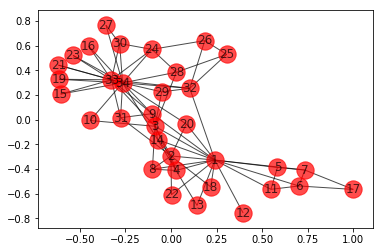

In [61]:
posizione = nx.spring_layout(karate_graph)
nx.draw_networkx(karate_graph,pos=posizione,
                alpha=0.7)

## Analisi del grado
Una volta caricato il grafo in memoria una delle proprietà che solitamente si analizzano è la __distribuzione del grado__, una delle misure di centralità in una network. Dal momento che il karate graph non è orientato, per ora non distinguiamo tra grado in ingresso (in-degree) e grado in uscita (out-degree).

In NetworkX il metodo __degree()__ calcola il grado di ogni nodo. Passando la vista al costruttore dict() ottengo un dictionary con chiave id del nodo e valore il grado del corrispettivo nodo.

In [62]:
dict(karate_graph.degree())

{'2': 9,
 '1': 16,
 '3': 10,
 '4': 6,
 '5': 3,
 '6': 4,
 '7': 4,
 '8': 4,
 '9': 5,
 '11': 3,
 '12': 1,
 '13': 2,
 '14': 5,
 '18': 2,
 '20': 3,
 '22': 2,
 '32': 6,
 '31': 4,
 '10': 2,
 '28': 4,
 '29': 3,
 '33': 12,
 '17': 2,
 '34': 17,
 '15': 2,
 '16': 2,
 '19': 2,
 '21': 2,
 '23': 2,
 '26': 3,
 '24': 5,
 '30': 4,
 '25': 3,
 '27': 2}

Per farmi restuire il grado di un singolo nodo ho le seguenti opzioni ...

In [63]:
karate_graph.degree()['34']

17

In [64]:
karate_graph.degree('34')

17

In [65]:
len(list(karate_graph.neighbors('34')))

17

Il secondo metodo mi permette di ottenere il grado data un lista di nodi. Ciò è molto utile per ottenere il grado di un sottoinsieme di nodi.

In [66]:
dict(karate_graph.degree(['34','22','1','10']))

{'34': 17, '22': 2, '1': 16, '10': 2}

**Esercizio**: Si scarichi il grafo dei retweet pubblicato all'indirizzo http://networkrepository.com/rt-pol.php. I nodi sono gli utenti di Twitter ed esiste un link tra due utenti solo se uno dei due ha retweetato uno status(tweet) dell'altro.

Caricare in memoria la rete scaricata (attenzione ai campi di ogni riga) e rispondere alle seguenti domande:

- Quanti nodi ci sono nella rete? 
- Quanti archi?
- Qual è l'id del nodo con grado massimo?

Per estrarre il nodo di grado massimo posso ordinare i valori del dictionary del grado e cercare il primo nodo il cui grado corrisponde al grado massimo.

In [79]:
twitter = nx.Graph()
with open('data/rt-pol.txt') as f:
    for line in f:
        source, destination, _ = list(map(int,line.strip().split(',')))
        twitter.add_edge(source, destination)
print('Numero di nodi: {}'.format(twitter.order()))
print('Numero di archi: {}'.format(twitter.size()))
user_max_twitter = sorted(dict(twitter.degree()).items(),key= lambda x:x[1], reverse=True)[0][0]

Numero di nodi: 18470
Numero di archi: 48053


### Vicini di un nodo
Per ottenere i vicini di un nodo _n_ posso utilizzare due metodi:
1. Accedere al dictionary associato alla chiave _n_ dell'oggetto **Graph.adj**: G.adj()[n]
2. Utilizzare una sintassi più concisa: G[n]

In [84]:
print(set(karate_graph.adj['6'].keys()))
print(set(karate_graph['6'].keys()))

{'11', '17', '7', '1'}
{'11', '17', '7', '1'}


**Esercizio**: Estrarre i vicini del nodo con grado massimo nel grafo di  Twitter

In [85]:
set(twitter[user_max_twitter].keys())

{14,
 39,
 49,
 62,
 64,
 81,
 100,
 108,
 113,
 128,
 137,
 140,
 151,
 153,
 173,
 177,
 182,
 235,
 237,
 246,
 295,
 302,
 316,
 323,
 333,
 346,
 353,
 361,
 368,
 375,
 384,
 392,
 438,
 490,
 526,
 549,
 554,
 603,
 618,
 625,
 650,
 663,
 740,
 747,
 761,
 781,
 814,
 850,
 872,
 904,
 906,
 917,
 922,
 950,
 967,
 990,
 1009,
 1031,
 1034,
 1060,
 1071,
 1075,
 1088,
 1120,
 1140,
 1189,
 1198,
 1271,
 1281,
 1288,
 1293,
 1297,
 1300,
 1302,
 1305,
 1324,
 1358,
 1424,
 1441,
 1504,
 1506,
 1524,
 1557,
 1570,
 1587,
 1611,
 1640,
 1660,
 1697,
 1750,
 1798,
 1814,
 1826,
 1834,
 1884,
 1893,
 1902,
 1947,
 1958,
 2030,
 2033,
 2046,
 2079,
 2105,
 2121,
 2131,
 2158,
 2173,
 2202,
 2211,
 2221,
 2338,
 2340,
 2371,
 2373,
 2410,
 2432,
 2444,
 2551,
 2572,
 2578,
 2580,
 2606,
 2640,
 2647,
 2717,
 2764,
 2777,
 2797,
 2817,
 2830,
 2863,
 2879,
 2890,
 3004,
 3089,
 3094,
 3142,
 3150,
 3222,
 3263,
 3312,
 3335,
 3355,
 3435,
 3492,
 3517,
 3536,
 3537,
 3574,
 3591,
 3620

### Statistiche puntuali
Una volta ottenuto il campione (lista dei gradi) posso calcolare alcune statistiche:
* il grado medio
* il grado massimo
* il grado minimo
* la mediana del campione
* la moda del campione

Per calcolare queste statistiche introduciamo due librerie per il calcolo scientifico: __numpy__ e __scipy__.

In [86]:
import scipy.stats as sp

#### Grado medio

In [87]:
campione_grado_karate = list(dict(karate_graph.degree()).values())

In [88]:
np.mean(campione_grado_karate)

4.588235294117647

oppure

In [89]:
sum(campione_grado_karate)/karate_graph.order()

4.588235294117647

#### Grado massimo e minimo

In [90]:
print(np.max(campione_grado_karate))
print(np.min(campione_grado_karate))

17
1


#### moda e mediana

In [93]:
print(np.median(campione_grado_karate)) # mediana
print(sp.mode(campione_grado_karate).mode[0]) # moda

3.0
2


## La distribuzione del grado - PDF/CDF/CCDF
Dato il nostro campione il primo passo nella costruzione della varie funzioni che descrivono la distribuzione è contare quante volte un elemento occorre.

In questo caso possiamo utilizzare il metodo __histogram__ di numpy.

Vediamo un esempio del suo funzionamento ...

In [94]:
import random

In [95]:
test = [random.randint(1,10) for i in range(1000)]

Per avere un'idea del contenuto di test utilizzo lo slicing per estrarre una sottolista. __list[start:end]__ indica che voglio la sottolista che inizia all'indice _start_ incluso e termina all'indice _end_ escluso.

In [96]:
test[:10]

[6, 3, 3, 6, 7, 4, 8, 2, 10, 3]

L'interfaccia del metodo histogram è la seguente:

**numpy.histogram(a, bins=10, range=None, normed=False, weights=None, density=None)**

L'unico parametro che ci interessa è __bins__, il quale accetta:
1. un intero
2. una lista di float
3. una stringa (non ci interessa)

Il parametro è propedeutico alla computazione di intervalli consecutivi:
<img src="figures/intervalli.jpg">

Nel nostro caso utilizzeremo una lista di numeri.

Come primo passo estraiamo max e min

In [97]:
min_t = min(test)
max_t = max(test)
min_t, max_t

(1, 10)

Creo una lista con gli estremi degli intervalli. Nel nostro caso ogni intervallo ha lunghezza 1. Utilizzo il metodo __arange__ di numpy la cui semantica è uguale al metodo __range__ visto nelle lezione precedente.

In [99]:
np.arange(min_t,max_t+1)

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

Ora eseguiamo il conteggio

In [100]:
counts, bins = np.histogram(test, bins=np.arange(min_t,max_t+1))

In [101]:
print(bins)
print(counts)

[ 1  2  3  4  5  6  7  8  9 10]
[ 99  99  84  99  98 102 102 110 207]


La lunghezza di count è 9. C'è un errore !! I conteggi dei 9 e dei 10 vengono aggregati.

Gli intervalli sono chiusi a sinistra e aperti a destra: [a,b) <=> a<= x < b, ad eccezione dell'ultimo intervallo che è chiuso su entrambi gli estremi. Nel nostro caso l'ultimo intervallo sarà [9,10] => vengono conteggiati sia i 9 che i 10. Per ovviare al problema basta estendere l'intervallo di un'altra unità.

In [102]:
counts, bins = np.histogram(test, bins=np.arange(min_t,max_t+2))

In [103]:
print(bins)
print(counts)

[ 1  2  3  4  5  6  7  8  9 10 11]
[ 99  99  84  99  98 102 102 110 108  99]


Ora possiamo calcolare la PDF, i.e.
\begin{equation*}
P(K = k) = \frac{count(k)}{N}
\end{equation*}
dove $N$ è il numero di elementi del campione.

In [104]:
pdf = counts / len(test)
pdf

array([0.099, 0.099, 0.084, 0.099, 0.098, 0.102, 0.102, 0.11 , 0.108,
       0.099])

**Esercizio**: come possiamo verificare che pdf sia veramente una distribuzione di probabilità?

In [107]:
np.sum(pdf)

1.0

In [110]:
len(([e for e in pdf if not (e >= 0 and e<=1)]))

0

Ora possiamo applicare lo stesso procedimento al campione con i gradi dei nodi.

In [111]:
min_k = min(campione_grado_karate)
max_k = max(campione_grado_karate)
count_karate, bins_karate = np.histogram(campione_grado_karate,
                                        bins = np.arange(min_k,max_k+2))

In [112]:
dict(zip(bins_karate,count_karate))

{1: 1,
 2: 11,
 3: 6,
 4: 6,
 5: 3,
 6: 2,
 7: 0,
 8: 0,
 9: 1,
 10: 1,
 11: 0,
 12: 1,
 13: 0,
 14: 0,
 15: 0,
 16: 1,
 17: 1}

In [113]:
pdf_karate = count_karate / karate_graph.order()
print(pdf_karate)

[0.02941176 0.32352941 0.17647059 0.17647059 0.08823529 0.05882353
 0.         0.         0.02941176 0.02941176 0.         0.02941176
 0.         0.         0.         0.02941176 0.02941176]


###  Visualizzazione della PDF
Utilizzando matplotlib possiamo visualizzare la PDF

Text(0, 0.5, 'PDF')

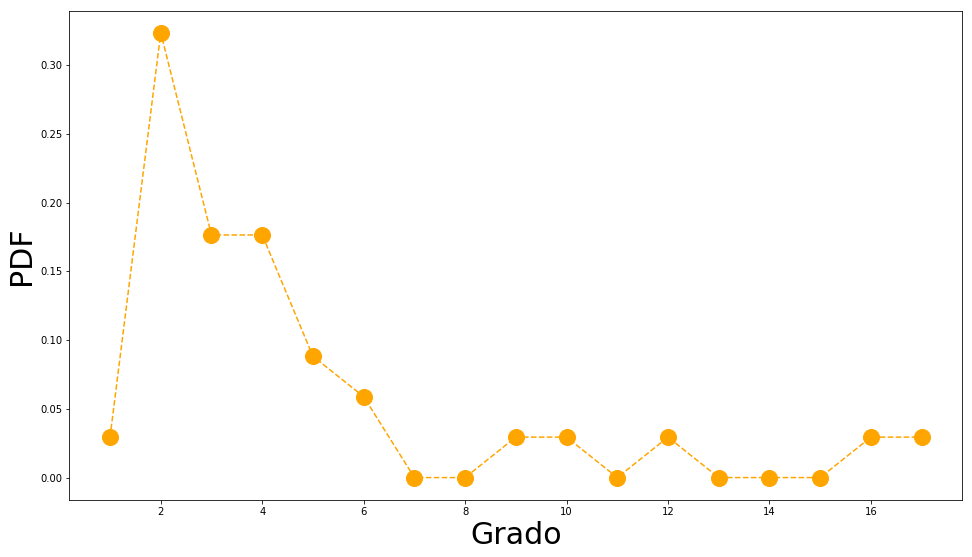

In [114]:
fig = plt.figure(figsize=(16,9))
assi = fig.gca()
assi.plot(bins_karate[:-1],pdf_karate, color='orange',marker='o', linestyle='--', ms=16)
assi.set_xlabel('Grado',size=30)
assi.set_ylabel('PDF',size=30)

# Calcolo della PDF in We Heart It

## Graph loading from db

In [115]:
import sqlite3

In [116]:
database = sqlite3.connect('whispider/link_db')

In [117]:
whi_graph = nx.DiGraph()
for e in database.execute('select * from links;'):
    whi_graph.add_edge(e[0],e[1])

In [118]:
whi_graph.order(), whi_graph.size()

(61686, 92472)

## Distribuzione del grado

In [121]:
campione_gradi_whi = list(dict(whi_graph.degree()).values())

In [122]:
min_whi = min(campione_gradi_whi)
max_whi = max(campione_gradi_whi)
min_whi, max_whi

(1, 847)

In [123]:
count_whi, bin_whi = np.histogram(campione_gradi_whi, bins = np.arange(min_whi,max_whi+2))

In [128]:
pdf_whi = count_whi/ whi_graph.order()

In [129]:
np.sum(pdf_whi)

1.0

### Visualizzazione

Text(0, 0.5, 'PDF')

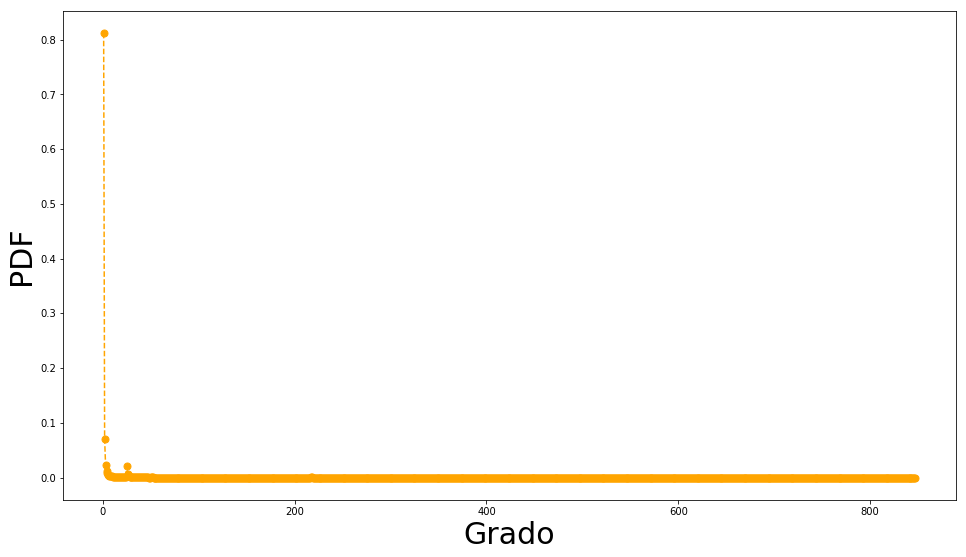

In [132]:
fig = plt.figure(figsize=(16,9))
assi = fig.gca()
assi.plot(bin_whi[:-1],pdf_whi, color='orange',marker='o', linestyle='--', ms=7)
assi.set_xlabel('Grado',size=30)
assi.set_ylabel('PDF',size=30)

### CDF
La funzione di ripartizione è definita come:
$$ F_X(x) = P(X\leq x);  -\infty<x<+\infty $$
nel caso discreto possiamo scrivere l'evento $X\leq x$ come 
$$ \bigcup_{k \leq x} (X = k) $$
Ciò permette di riscrevere la formula della funzione di ripartizione come
$$ F_X(x) = P(\bigcup_{k \leq x} (X = k)) = \sum_{k\leq x}P(X=k)$$
Nel caso del grado, e in generale per un campione finito, $P(X=k)$ sappiamo come calcolarlo (abbiamo sprecato un quarto di notebook per farlo). Inoltre, dato che il campione è finito e abbiamo un minimo e massimo, tutti i valori di k minore del minimo e maggiori del massimo hanno probabilità 0. Tutto ciò ci permette di ricavare la formula
$$ F_X(x) = \sum_{min \leq k\leq x}P(X=k)$$
dove min è il valore minimo del campione.

Se vogliamo calcolare la CDF - funzione di ripartizione - possiamo sfruttare il seguente schema:
<img src="figures/somma_cumulativa.jpg">
In sintesi per ogni valore di k ammissibile posso sfruttare la somma calcolata al passo precedente e aggiungo il valore relativo al k che sto considerando.

La funzione cumsum di numpy esegue questo tipo di sommatoria. Quindi posso facilmente ottenere la cdf

#### Visualizzazione

Text(0, 0.5, 'CDF')

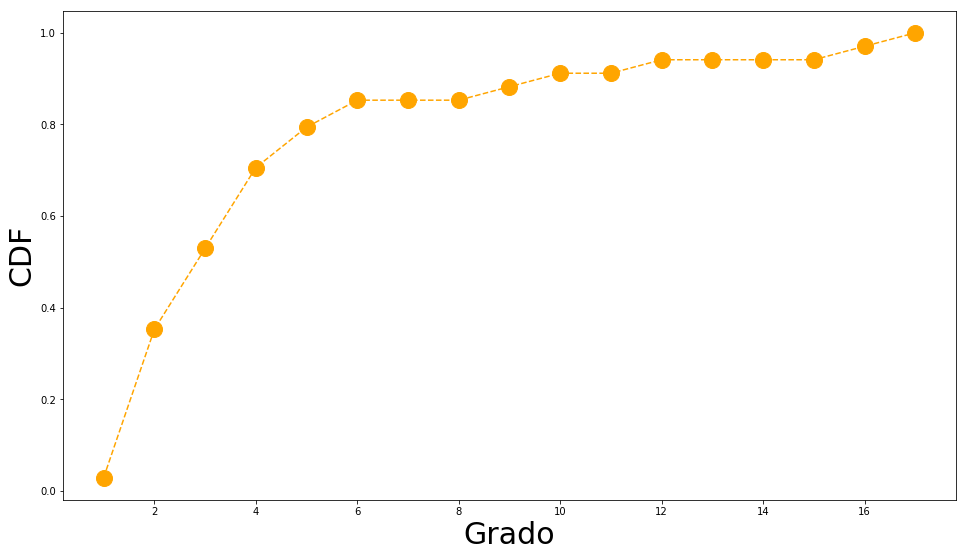

Per calcolare la CDF possiamo utilizzare l'oggetto ECDF del modulo statsmodel

L'oggetto ECDF restituisce una CDF partendo dal campione

Text(0, 0.5, 'CDF')

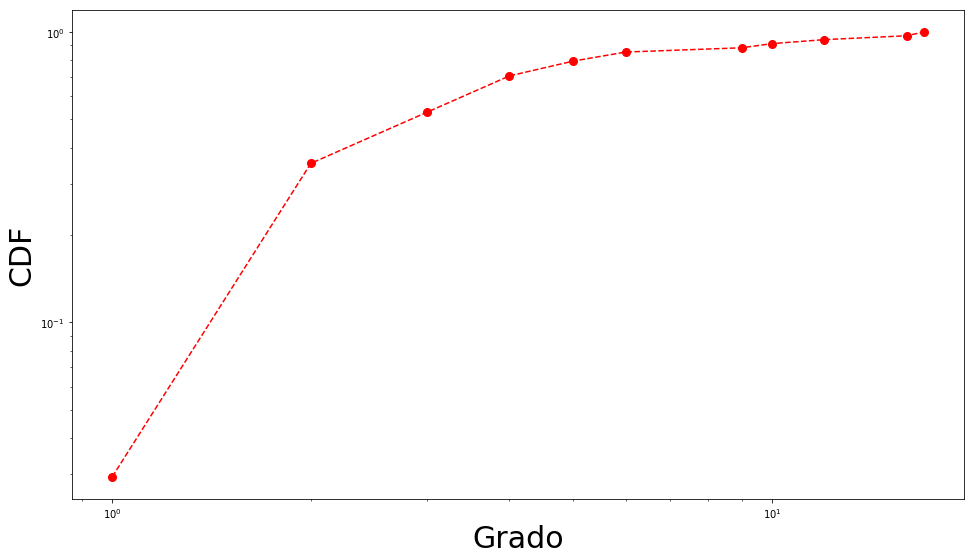

## Analisi di una online social network
### L'era della power-law :-)
Ripetiamo la stess analisi su una sottorete estratta da Facebook (http://networkrepository.com/socfb-Stanford3.php)

### CDF in linear e logscale

## Facebook VS Erdos-Renyi
In questa parte confrontiamo la distribuzione del grado di Facebook e la distribuzione di un grafo casuale (Erdos-Renyi) il cui grado medio è lo stesso della rete di Facebook.

Come primo passo calcoliamo il grado medio in Facebook

Dal momento che
$$ <k> = p (N-1)$$
posso ottenere $p = \frac{<k>}{N-1}$, dove N è il numero di nodi del grafo.

Nel nostro caso ...

Ora possiamo generare grafo casuale Gilbert/ Erdos-Renyi utilizzando il metodo __gnp_random_graph()__.

Ora possiamo confrontare la distribuzione del grado di Facebook con la distribuzione del grado del grafo casuale.

### Identificare gli hub
Infine vogliamo identificare quali sono i nodi con più alto grado.

Il primo passo è definire una soglia per quantificare cosa intendiamo per 'alto grado'. Per questo possiamo utilizzare la CDF. In particolare fissato una $p \in [0,1]$ vogliamo trovare il valore del grado $k$ tale che $F_X(k)=p$. Questa operazione corrisponde alla definizione di _quantile_.

In Python posso calcolare i quantili utilizzando la funzione di Numpy **percentile**. In particolare fissiamo $p=0.95$

Ciò indica che il 95% dei nodi ha grado minore di quantile_95.

Ora estraggo quali sono i nodi hub utilzzando la list comprehension

## Approfondimento: binning logaritmico
Una migliore visualizzazione della PDF si può ottenere utilizzando il binning logaritmico che sostanzialmente crea un insieme di intervalli di uguale lunghezza se si calcola il logaritmo in base 10 degli estremi degli intervalli.

Per capire come costruire un binning logaritmico partiamo da un binning uniforme tra 0 e 4 considerando intervalli di lunghezza 0.5. Possiamo definire l'insieme di intervalli:

Se interpretiamo gli estremi precedenti come esponenti della base 10, otteniamo i seguenti intervalli

Le lunghezze degli intervalli in esp_10 diventano:

I cui rapporti sono costanti

Abbiamo così ottenuto un binning logaritmico. 

Se invece abbiamo un campione e vogliamo ottenere un binning logaritmico che dipende dal campione, come primo passo dobbiamo ottenere gli esponenti che andranno a definire i nostri estremi del binning (lo 0 e il 4 nel caso precedente). Gli estremi si ottengono calcolando il logaritmo del minimo e del massimo del campione

Definiamo quanti intervalli vogliamo

Otteniamo 'number_of_bins' intervalli equispaziati tra i due estremi indviduati

Come mostrato in precedenza lin_bins sono gli esponenti, quindi per ottenere gli intervalli finali dobbiamo elevare 10 agli espoenenti ottenuti e trasformarli in interi visto che il grado è un unmero intero.

Infine, dato che la sequenza contiene elementi ripetuti, si estraggono solo i valori unici

Una volta ottenuto il binning logaritmico la costruzione della PDF è simile a quanto visto in precedenza

# Centralità (Zafarani)

## Degree Centrality
<img src='degree.png'>

### Costruzione del grafo diretto dei messaggi tra studenti di UC Irvine

### Degree

### In-Degree
Il grado in entrata o 'in-degree', $k^{-}(n)$  corrisponde al numero di archi entranti in un nodo $n$. In NetworkX tale proprietà è calcolata dal metodo **in_degree** della classe _DiGraph_. 
**Parametri**
- nbunch: id del nodo, lista di nodi e tutti i nodi (default); di cui voglio calcolare il grado
- weight: nome dell'attributo sull'arco utilizzato per calcolare il grado pesato di un nodo $s^-(n)$
$$s^-(n)=\sum_{v\in \Gamma^-{n}}w(v,n)$$
dove $\Gamma(n)$ indica l'insieme dei vicini del nodo $n$ e $w(u,n)$ indica il valore dell'attributo associato all'arco $(u,n)$.

Il metodo restituisce un iteratore di coppie (id_nodo, in_degree) che posso convertire in un dictionary.

0
137
999


### Out-Degree
Il grado in uscita o 'out-degree', $k^+(n)$, corrisponde al numero di archi in uscita da un nodo $n$. Il metodo corrispondente è **out_degree** ed ha una signature analoga al metodo *in_degree*.

0
237


### Esiste una relazione tra in-degree e out-degree

**Esercizio guidato**: Ci chiediamo se esiste nella network che stiamo analizzando esista una relazione tra il grado in uscita di un nodo e il rispettivo grado in entrata.
 
Per far ciò dobbiamo creare un dictionary che per ogni nodo contiene i due gradi. Nello specifico associamo un dictionary con le chiavi 'in', 'out' corrispondenti ai valori calcolati

Ora creiamo un dictionary che per ogni valore del grado in uscita contiene una lista dei gradi in entrata corrispondente al grado in uscita.

L'ultimo passo consiste nel calcolare la media e la mediana delle liste in 'out2ins'

Ora visualizziamo il grafico

**Esercizio guidato avanzato**
Utilizziamo ora un binning logaritmo in modo da aggregare i nodi con alto grado in uscita.

Costruiamo il binning utilizzando le note precedenti:

Per poter popolare le liste in *out2bins_log* ci serve una funzione che restituisce in quale intervallo è presente un determinato grado. Possiamo utilizzare la funzione di Numpy, **digitize(x, bins, right=False)** che restituisce l'indice $i$ tale che $bins(i-1) \leq x < bins(i)$

Il resto dell'esercizio è simile alla visualizzazione precedente. Calcoliamo media e mediana

E le visualizzaziamo

**Esercizio guidato**: Possiamo anche chiederci quali nodi hanno un comportamento 'particolare'. Nello specifico vogliamo identificare, se esistono, i nodi con una elevata discrepanza tra l'attività in uscita e quella in entrata.

Calcoliamo quindi la differenza tra la strength dei nodi, in entrata e uscita

Estriamo i valori della differenza, calcoliamo la CDF e la visualizzaziamo

Come abbiamo visto per l'identificazione degli hub dobbiamo estrarre un valore di soglia che identifica un comportamento 'anomalo'. Possiamo calcolare il quantile 0.99.

Oppure calcolare la media e sommare 3 deviazioni standard

Infine identifichiamo i nodi con un comportamento anomalo

In [ ]:
# Identificazione nodi outlier
nodi_anomali = set([k for k,v in node2diff.items() if np.abs(v) >= q99])

In [ ]:
print(nodi_anomali)

## Altre misure di centralità (Zafarani)

Per confrontare la degree centrality in due reti differenti posso normalizzare il grado, secondo i seguenti schemi:

### Normalizzazione del grado
<img src='degree_norm.png'>

## Eigenvector centrality
L'idea di questa centralità è molto semplice: un nodo è importante se ha molti amici importanti
<img src='eig.jpg'>

In NetworkX la computazione della eigenvector centrality è eseguita dal metodo:

**eigenvector_centrality(G, max_iter=100, tol=1e-06, nstart=None, weight=None)**

0.0015769463599309445
0.008194725751443355


**Esercizio**: Estrarre i nodi con centralità massima nei casi di eigenvectort centrality pesata e non.

('1624', 0.469127802110353) ('32', 0.153518668255088)


{0: -1.7434911362201625e-12, 1: 6.601419304589702e-07, 3: 6.601409452620102e-07, 2: 0.9999999999995642}


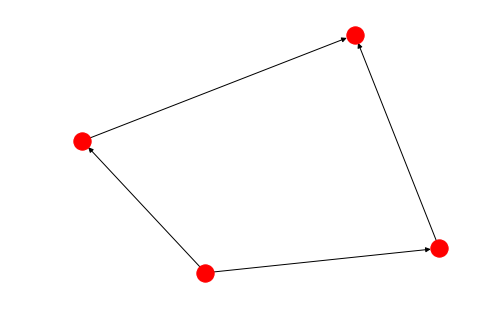

## Katz centrality
Per ovviare al problema evidenziato dal grafo 'giocattolo' nella Katz centrality viene introdotto il fattore $\beta$, grazie al quale si evitano valori di centralità uguali a 0.
<img src='katz.png'>

In NetworkX la Katz centrality è calcolata dal metodo:

**katz_centrality(G, alpha=0.1, beta=1.0, max_iter=1000, tol=1e-06, nstart=None, normalized=True, weight=None)**

In [168]:
1/(float(np.max(np.linalg.eig(nx.to_numpy_matrix(ucirvine_graph))[0]))+10)

C:\Users\matte\Miniconda3\envs\SomeniLab\lib\site-packages\ipykernel_launcher.py:1: ComplexWarning: Casting complex values to real discards the imaginary part
  """Entry point for launching an IPython kernel.


0.005212229393666619

0.0055248618784530384

{'1': 0.024696384291284484,
 '2': 0.022084115418726437,
 '3': 0.026820751486571676,
 '4': 0.021527789801379482,
 '5': 0.021388053805873764,
 '6': 0.027813686346744648,
 '7': 0.022076262569966084,
 '8': 0.029663652222511234,
 '9': 0.02853098384056474,
 '10': 0.021648719460095982,
 '11': 0.02186173596403786,
 '12': 0.025771410970454947,
 '13': 0.02184735866390961,
 '14': 0.021815621396534913,
 '15': 0.02200774691030157,
 '16': 0.021536700064929287,
 '17': 0.02171280503079956,
 '18': 0.02166692469679212,
 '19': 0.024995146468317162,
 '20': 0.02229307265717205,
 '21': 0.02161692144792014,
 '22': 0.0217812178324767,
 '23': 0.021697890377886914,
 '24': 0.021536700064929287,
 '25': 0.021635464125696027,
 '26': 0.0239558076760911,
 '27': 0.026680253518924085,
 '28': 0.021527057813400387,
 '29': 0.023242615659652348,
 '30': 0.023439069707359306,
 '31': 0.021510171307360555,
 '32': 0.03959421548823928,
 '33': 0.021908130381579054,
 '34': 0.026663834736072946,
 '35': 0.02167063251858665,
 '36': 0

## Page rank
<img src='page.png'>
**Esercizio**: Calcoliamo il pagerank sul grafo di UCIrvine utilizzando o meno i pesi degli archi. Si identifichino i nodi con pagerank maggiore.

('32', 0.006860894208174804)
('32', 0.005997514282124588)


Il nodo con PageRank piu' elevato rimane lo stesso, indipendentemente dal peso associato agli archi

## Betweenness centrality
<img src='bet.png'>
<img src='bet_norm.png'>

In NetworkX questa centralita' e' calcolata dal metodo
```python
betweenness_centrality(G, k=None, normalized=True, weight=None, endpoints=False, seed=None)
```
Il coefficiente di normalizzazione dipende dal tipo di grafo (non orientato/orientato)

Il parametro $k$ restringe il numero di nodi $\in V$ tra cui calcolare i cammini minimi. Nello specifico vengono estratti $k$ nodi in modo casuale da $V$. Questa modalita' e' utile quando il tempo di computazione applicando l'algoritmo standard e' elevato

E' possibile calcolare la betweenness centrality valutando il numero di cammini minimi che passano gli archi, anziche' sui nodi. In questo caso il metodo da utilizzare e':
```python
edge_betweenness_centrality(G, k=None, normalized=True, weight=None, seed=None)
```
Viene restituito un dictionary che associa ad ogni arco del grafo il corrispettivo valore di betweenness.

La betweenness centralit sugli archi puo' essere utilizzata per valutare la quantita' di informazione che puo' passare attraverso una relazione, ipotizzando che l'informazione si propaghi nella rete solo attraverso i cammini minimi. 


**Esercizio**: Si trovi il nodo con betweenness centrality maggiore nel grafo UCIrvine considerando o meno l'orientamento degli archi. Per estrarre la versione non orientata di un grafo orientato $D$ si puo' utilizzare il metodo di NetworkX **to_undirected()**

## Closeness centrality
<img src='close.png'>

Piu' i valori della closeness centrality sono elevati piu' il nodo e' centrale.

Il metodo per il calcolo della closeness centrality in NetworkX e':
```python
closeness_centrality(G, u=None, distance=None, wf_improved=True, reverse=False)
```
_distance_ ha lo stesso significato del classico attributo _weight_ utilizzato nei metodi finora visti. 

Il metodo utilizza una versione migliorata della closeness centrality:
$$ C_{+}(u) = \frac{n-1}{N-1}C_c(u) $$
dove $N$ indica il numero di nodi del grafo e $n$ il numero di nodi raggiungibili da $u$.

**Esercizio**: Si calcoli la closeness centrality utilizzando o meno la versione miglioarata dell'indice. 

## Structural equivalence
<img src='jaccard_cosine.png'>

**Esercizio**: Si implementino due funzioni *structural_equivalence_jaccard(graph,nodo1,nodo2)* e *structural_equivalence_cosine(graph,nodo1,nodo2)* che calcolano l'equivalenza strutturale dei due nodi passati come argomento. Si calcolino le equivalenza strutturali di un nodo estratto a caso ed un suo vicino estratto a caso

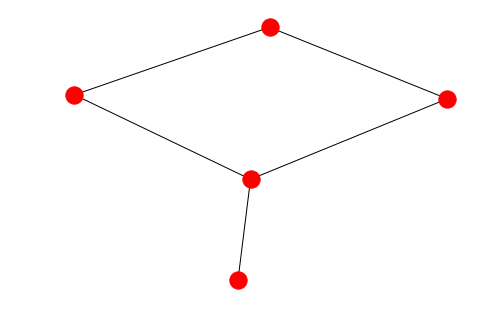

0.6666666666666666
0.8164965809277261


# Componenti
<img src='compo.png'>

## Grafi non orientati
Per verificare se un grafo non orientato e' connesso posso utilizzare il metodo di NetworkX:
```python
is_connected(G)
```
Per calcolare il numero di componenti connesse posso utilizzare il metodo
```python
number_connected_components(G)
```
Mentre il metodo
```python
connected_components(G)
```
restituisce un generatore di insiemi di nodi, uno per ogni componente connessa.

**Esercizio:** Generare una lista contenente la dimensione delle componenti connesse nella versione non orientata del grafo di UCIrvine.

**Esercizio:** Ottenere l'insieme dei nodi appartenenti alla componente connessa principale. Utilizzare la funzione **max** e specificare l'argomento key che accetta una funzione di comparazione. Per esempio 
```python
max([(2,3),(4,5,4,3),(2,)],key=len)
```
restituisce la tupla (4,5,4,3) perchè è la più lunga.

Per estrarre i sottografi delle componenti connesse è consigliabile utilizzare il seguente codice:
```python
G.subgraph(c).copy() for c in connected_components(G)
```

## Grafi orientati
Per verificare se un grafo orientato è fortemente connesso posso utilizzare il metodo
```python
is_strongly_connected(G)
```
Per calcolare il numero di componenti fortemente connesse utilizzo il metodo
```python
number_strongly_connected_components(G)
```
Mentre il metodo
```python
strongly_connected_components(G)
```
restituisce un generatore di insiemi di nodi appartenenti alle componenti fortemente connesse

Rispetto ai metodi per i grafi non orientati, esiste un metodo che restituisce una rappresentazione compatta della rete in cui le componenti fortemente connesse sono i nodi del grafo ed esiste una arco tra le componenti A e B se esiste un arco tra un nodo $a\in A$ e$b\in B$

I corrispettivi metodi che estraggono le componenti debolmente connesse hanno la stessa signature in cui _weakly_ sostituisce _strongly_.

**Esercizio Guidato**: Si contino il numero di componenti fortemente e debolmente connesse nel grafo di UCIrvine e si estragga la componente fortemente connessa principale (giant strongly connected component)

La visite di una rete vengono definite **Traversal**

# Depth-First Search - Visita in profondita'
<img src='dfs.png'>

Utilizzando il metodo di NetworkX
```python
dfs_tree(G[, source, depth_limit])
```
ottengo l'albero della visita in profondita'. Posso specificare un nodo sorgente (radice dell'albero) da cui iniziare la visita mediante il parametro _source_ e fissare la profondita' della visita (quanti hop dalla sorgente) mediante il parametro *depth_limit*

**Esercizio** Calcolare l'albero dfs partendo da un nodo estratto in maniera casuale dal grafo di UCIrvine e limitando la profondita' a 3

# Breadth-first Search BFS - Visita in ampiezza
<img src='bfs.png'>

Anche in questo caso posso farmi restituire l'albero della visita in ampiezza tramite il metodo
```python
bfs_tree(G, source, reverse=False)
```
che restituisce un grafo orientato (albero)

La visita in ampiezza si relaziona con il calcolo dei cammini minimi.

# Cammini minimi - Grafo non pesato

I metodi principali per il calcolo dei cammini minimi in un grafo non pesato sono
```python
single_source_shortest_path(G, source[, cutoff])
```
e
```python
all_pairs_shortest_path(G[, cutoff])
```
Il primo metodo calcola i cammini minimi fissando un nodo sorgente ed eventualmente bloccando la visita del grafo se il cammino minimo ha lunghezza maggiore di _cutoff_. Il secondo metodo calcola i cammini minimi per ogni coppia di nodi del grafo.

**Esercizio** Calcolare il cammino minimo tra due nodi estratti in modo casuale dal grafo UCIrvine. Si utilizzi solo il primo metodo, in quanto il secondo ha una complessita' elevata $O(n^2)$.

# Cammini di peso minimo - Grafo pesato

Nel caso di grafo pesato si utilizza l'algoritmo di Dijkstra
<img src='dijkstra.png'>
implementato dal metodo
```python
single_source_dijkstra(G, source, target=None, cutoff=None, weight='weight')
```
dove posso specificare un nodo obiettivo se voglio calcolare il peso del cammino di peso minimo dal nodo _source_ al nodo _target_, oppure limitare il calcolo del peso del cammino utilizzando il parametro _cutoff_. Come per molti metodi visti finora, il parametro weight specifica quale attributo utilizzare per il peso dall'arco

In questa parte del notebook analizzeremo alcune proprietà della rete dei blog politici durante le elezioni americane del 2004.
Il grafo è orientato ed etichettato. Ad ogni nodo è associato un orientamento politico (destra/sinistra).

In [1]:
import networkx as nx

#### Caricamento del grafo
I link sono salvati nel file out.moreno_blogs_blogs. Il file contiene una edge list (prime due righe sono commenti). In ogni riga gli estremi dell'arco (sorgente e destinazioni) sono separati da un carattere di tabulazione.

**Esercizio**: Tenendo in considerazione le precedenti indicazioni si costruisca il grafo orientato tra i blog.

1

Il file ent.moreno_blogs_blogs.blog.orientation contiene gli attributi da assegnare ai nodi. Il file è testuale.<br>
La riga i-esima contiene l'attributo da assegnare al nodo con identificatore i.

**Esercizio**: Si assegni ad ogni nodo del grafo precedentemente costruito il relativo attributo

**Esercizio**: Si contino quanti nodi hanno un determinato attributo. Nel caso dei blog, quanti sono i blog orientati a 'Destra'?

In [14]:
from collections import Counter

Counter({'left-leaning': 588, 'right-leaning': 636})

## Reciprocità
<img src='reciprocity.png'>
che equivale alla seguente formula
<img src='reciprocity_formula.png.jpg'>
Con questa formulazione il calcolo del numeratore diventa più semplice.<br>
Praticamente si deve verificare se, dato un arco (a,b), esiste corrispettivo (b,a). In tal caso si incrementa il contatore degli archi reciproci di una unità

**Esercizio**: si definisca la funzione _reciprocity(graph)_ che restituisce la reciprocità di un grafo orientato

0.24268068331143233

Esiste una seconda formulazione della reciprocità.
<img src='reciprocity_formula2.jpg'>
dove (a) corrisponde al numeratore della formula utilizzata per la prima formulazione della reciprocità, mentre (b) corrisponde al numero di link nel grafo non orientato ottenuto da quello orientato<br>
**Esercizio**: si definisca la funzione _reciprocity2(graph)_ che restituisce la reciprocità di un grafo orientato, secondo la seconda formulazione

**Esercizio**: Calcolare la reciprocità (entrambe le definizioni) dell rete dei blog politici.

0.1380846991266898

## Global Clustering Coefficient
<img src='transitivity.png'>
La formula per il calcolo del clustering coefficient è:
<img src='cc_formula.png'>

In NetworkX la funzione per il calcolo del clustering coefficient è **transitivity**

0.2259585173589758

E' possibile anche contare il numero di triangoli mediante la funzione **triangle**

**Esercizio**: Si contino il numero di triangoli nel grafo non orientato relativo al grafo dei blog

101043.0

## Local Clustering Coefficient
<img src='lcc_formula.png'>

In NetworkX il metodo per il calcolo del cc locale è **clustering**

**Esercizio**: Si calcoli il cc locale di un nodo estratto casualmente dal grafo

890


0.41534391534391535

##  Assortatività
<img src='assorta_nominal.png'>
<img src='modularity.png'>

In NetworkX si calcola l'assortatività su attributi nominali mediante il metodo **attribute_assortativity_coefficient**

0.8229242280560486

<img src='assorta_ordinal_1.png'>
<img src='assorta_ordinal_2.png'>
In NetworkX l'assortatività su attributi ordinali viene calcolata mediante il metodo **numeric_assortativity_coefficient**

**Esercizio**: Dal momento che il grafo dei blog contiene attributi nominali, dobbiamo introdurre un attributo ordinale. Nel nostro caso l'aatributo età o age. Per imporre una correlazione positiva assumiamo che i blogger schierati a sinistra siano più giovani di quelli schierati a destra. Ad ogni blogger schierato a sinistra assegniamo un'età casuale tra 18 e 30, mentre ad ogni blogger schierato a destra assegniamo un'età casuale tra 40 e 50. Si calcoli l'assortatività sull'attributo age o età.

0.7424303064439673

## Community detection
In quest'ultima parte del notebook verranno presentati tre algoritmi per individuare le community in reti sociali.
Louvain e Label Propagation restituiscono community non sovrapposte, mentre CPM (Clique Percolation Method) restituisce community sovrapposte.

### Louvain
Per utilizzare l'algoritmo di Louvain si deve installare il relativo modulo tramite **pip install python-louvain**. Il modulo installato si chiama **community**

Per eseguire l'algoritmo invoco il metodo **best_partition**. Il metodo restituisce un dictionary in cui ad ogni nodo viene associato la community di appartenenza.

**Esercizio**: Si estraggano le community dal grafo non orientato dei blog.

Counter({0: 525,
         1: 636,
         2: 2,
         3: 40,
         4: 4,
         5: 2,
         6: 2,
         7: 3,
         8: 2,
         9: 4,
         10: 2,
         11: 2})

Il modulo community mette a disposizione anche il metodo **generate_dendogram** che ci permette di ottenere la gerarchia delle community. Il metodo, infatti, è gerarchico in quanto al passaggio $pass(i)$ aggrega le community identificate al passaggio $pass(i-1)$, come mostrato nell'esempio presentato nelle slide di teoria:
<img src='louvain_steps.png'>
La corrispondente gerarchia è la seguente:
<img src='hierarchy_louvain.png'>

Il metodo generate_dendogram restituisce una lista di dictionary, dove ogni dictionary rappresenta una partizione dei nodi. Ogni dictionary corrisponde ad un livello del dendogramma (albero).

32
13
12


Infine per valutare la modularity di una partizione in community posso utilizzare il metodo **modularity**

Nell'esempio valutiamo la modularity delle partizioni generate dai diversi passaggi dell'algoritmo.

0 0.4186032596823937
1 0.42686890926967797
2 0.4269074811012874


### Label propagation
Label propagation individua le community mediante un processo diffusivo su grafo. Il processo è definito dai seguenti passi:
1. Inizializzo ogni nodo con un'etichetta (id community) diversa
2. Per ogni nodo sostituisco la sua etichetta con quella più frequente tra i suoi vicini. In caso di parità scelgo un'etichetta a caso tra quelle più frequenti.
3. Il processo termina quando l'etichetta di ogni nodo corrisponde con l'etichetta più frequente trai suoi vicini.

In NetworkX l'algoritmo è implementato dal metodo **label_propagation_communities** il quale restituisce un generatore di insiemi che corrispondono alle community di nodi.


**Esercizio**: Si valuti la modularity della partizione identificata da Label Propagation. Si può utilizzare il metodo enumerate il quale, dato una lista $l$, restituisce una lista di coppie (i,v) tale che $l_i=v$ 

8


0.001314998733199665

Counter({0: 1208, 1: 4, 2: 2, 3: 2, 4: 2, 5: 2, 6: 2, 7: 2})

### CPM (Clique Percolation Method)
L'algoritmo si basa sulla definizione di $k$-clique community. Una $k$-clique community  è l'unione di tutte le $k$-clique che possono essere raggiunte attraverso una sequenza di $k$-clique adiacenti. Due $k$-clique sono adiacenti se hanno in comune $k-1$ nodi.

L'algoritmo:
1. estrae tutte le k-clique
2. costruisce un grafo non orientato i cui sono le k-clique ed esiste un arco $(u,v)$ sse le k-clique $u$ e $v$ sono adiacenti.
3. ogni componente connessa del grafo corrisponde ad una $k$-clique community

In NetworkX l'algoritmo CPM è implementato dal metodo **clique_communities(graph, k)** il quale restituisce un generatore di insiemi corrispondenti alla nodi appartenenti alle $k$-clique community identificate.

**Esercizio**: Identificare le $k$-clique community nel grafo dei blog americani.